## 가위바위보 분류기 만들기

웹캠을 사용하여 데이터를 준비해봅시다!  

1) 데이터 만들기
노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지를 각각 100장을 만들어봅시다.  

- https://teachablemachine.withgoogle.com/

2) 가위 이미지 데이터 만들기

웹캠 앞에서 포즈를 가위 포즈를 취한 후, <Hold to Record>버튼을 누르면 이미지가 캡쳐됩니다. 
- 여러 각도에서 찍기
- 여러 크기로 찍기
- 배경이 깔끔할 수록 좋음 (단색배경)

![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-9.max-800x600.png)

![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-10.max-800x600.png)

3) 100장의 가위 이미지를 캡쳐했다면, 우상단의 메뉴 아이콘을 눌러 다운로드 합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-1-11.png)

4) 가위 이미지들을 "scissor.zip"이라는 파일 이름으로 본인 컴퓨터에 저장해봅시다.
바위와 보 이미지들에 대해서도 위 과정을 진행해주세요!  
(각각, "rock.zip", "paper.zip", 이름을 저장해주세요!)

- 이미지 예시  
`ock_scissor_paper/paper` 폴더 내 이미지들은 아래와 같이 저장이 되어 있을 것입니다.



![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-12.max-800x600.png)

5) 데이터불러오기 + Resize하기  

숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해봅시다

In [1]:
## 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
# ## 학습데이터.zip 업로드
# from google.colab import files
# file_uploaded = files.upload()

In [8]:
# !unzip "rock_scissor_paper.zip" -d"./rock_scissor_paper" # 안에 있는 폴더 나옴
# !unzip "scissor.zip" -d "./scissor"
# !unzip "paper.zip" -d "./paper"
# !unzip "rock.zip" -d "./rock"

In [2]:
from PIL import Image
import os, glob

# 이미지 리사이즈 함수 정의
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  # 해당 경로의 확장자가 jpg인 모든 파일명 저장
    
	print(len(images), " images to be resized.")

	target_size=(28,28) # 변경 후 이미지 사이즈
	for img in images:
		old_img=Image.open(img) # 기존 이미지 불러오기
		new_img=old_img.resize(target_size,Image.ANTIALIAS) # 리사이즈
		new_img.save(img, "JPEG") # 리사이즈된 이미지를 jpeg 확장자로 저장
    
	print(len(images), " images resized.")

In [4]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 이미지 리사이즈
image_dir_path = "/content/drive/MyDrive/dataset/rock_scissors_paper_sjh/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [5]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 이미지 리사이즈
image_dir_path = "/content/drive/MyDrive/dataset/rock_scissors_paper_sjh/rock"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [6]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 이미지 리사이즈
image_dir_path = "/content/drive/MyDrive/dataset/rock_scissors_paper_sjh/paper"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [10]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/dataset/rock_scissors_paper_sjh"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


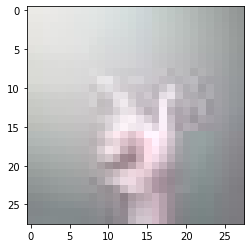

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 16)                5

## 딥러닝 네트워크 학습시키기

In [14]:
print('Before Reshape - x_train_norm shape : {}'.format(x_train_norm.shape))
x_train_reshape = x_train_norm.reshape(-1,28,28,3)
print('After Reshape - x_train_reshape shape : {}'.format(x_train_reshape.shape))

Before Reshape - x_train_norm shape : (300, 28, 28, 3)
After Reshape - x_train_reshape shape : (300, 28, 28, 3)


In [16]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_reshape, y_train, epochs=20)

Epoch 1/20
10/10 [==============================] - 1s 20ms/step - loss: 0.7020 - accuracy: 0.6433
Epoch 2/20
10/10 [==============================] - 0s 20ms/step - loss: 0.7051 - accuracy: 0.6667
Epoch 3/20
10/10 [==============================] - 0s 20ms/step - loss: 0.6873 - accuracy: 0.6667
Epoch 4/20
10/10 [==============================] - 0s 20ms/step - loss: 0.6811 - accuracy: 0.6667
Epoch 5/20
10/10 [==============================] - 0s 21ms/step - loss: 0.6772 - accuracy: 0.6667
Epoch 6/20
10/10 [==============================] - 0s 20ms/step - loss: 0.6737 - accuracy: 0.6667
Epoch 7/20
10/10 [==============================] - 0s 21ms/step - loss: 0.6706 - accuracy: 0.6667
Epoch 8/20
10/10 [==============================] - 0s 21ms/step - loss: 0.6677 - accuracy: 0.6667
Epoch 9/20
10/10 [==============================] - 0s 19ms/step - loss: 0.6648 - accuracy: 0.6667
Epoch 10/20
10/10 [==============================] - 0s 22ms/step - loss: 0.6614 - accuracy: 0.6667
Epoch 11/

## 테스트하기

In [ ]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]

In [19]:
image_dir_path = "/content/drive/MyDrive/dataset/rock_paper_scissors_sek"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test/255.0
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [21]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

10/10 - 0s - loss: 159.1628 - accuracy: 0.3467 - 81ms/epoch - 8ms/step
test_loss : 159.16282653808594
test_accuracy : 0.3466666638851166


## 더 좋은 네트워크 만들기

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import os, glob
def load_data(img_path, number_of_data=3900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


image_dir_path = "/content/drive/MyDrive/rps/dataset"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3900 입니다.
x_train shape: (3900, 28, 28, 3)
y_train shape: (3900,)


In [32]:
def load_data2(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/rps/rock_scissor_paper"
(x_test, y_test) = load_data2(image_dir_path, number_of_data=300)
x_test_norm = x_test/255.0
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [60]:
print('Before Reshape - x_train_norm shape : {}'.format(x_train_norm.shape))
x_train_reshape = x_train_norm.reshape(-1,28,28,3)
print('After Reshape - x_train_reshape shape : {}'.format(x_train_reshape.shape))

Before Reshape - x_train_norm shape : (3900, 28, 28, 3)
After Reshape - x_train_reshape shape : (3900, 28, 28, 3)


In [147]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(8,(3,3),padding='same',activation='relu',input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_181 (Conv2D)         (None, 28, 28, 8)         224       
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 14, 14, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_182 (Conv2D)         (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 7, 7, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_183 (Conv2D)         (None, 7, 7, 32)          4640      
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 3, 3, 32)       

In [148]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_reshape, y_train, epochs=20)

Epoch 1/20
122/122 [==============================] - 1s 5ms/step - loss: 0.8303 - accuracy: 0.6321
Epoch 2/20
122/122 [==============================] - 1s 5ms/step - loss: 0.0946 - accuracy: 0.9859
Epoch 3/20
122/122 [==============================] - 1s 5ms/step - loss: 0.0145 - accuracy: 0.9987
Epoch 4/20
122/122 [==============================] - 1s 5ms/step - loss: 0.0056 - accuracy: 0.9997
Epoch 5/20
122/122 [==============================] - 1s 5ms/step - loss: 0.0034 - accuracy: 0.9997
Epoch 6/20
122/122 [==============================] - 1s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/20
122/122 [==============================] - 1s 5ms/step - loss: 8.1946e-04 - accuracy: 1.0000
Epoch 8/20
122/122 [==============================] - 1s 5ms/step - loss: 5.7473e-04 - accuracy: 1.0000
Epoch 9/20
122/122 [==============================] - 1s 5ms/step - loss: 4.1915e-04 - accuracy: 1.0000
Epoch 10/20
122/122 [==============================] - 1s 5ms/step - loss: 3.3202e-04 - 

In [149]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

10/10 - 0s - loss: 765.7119 - accuracy: 0.5400 - 194ms/epoch - 19ms/step
test_loss : 765.7118530273438
test_accuracy : 0.5400000214576721


# VGG16

In [151]:
vgg_16 = keras.models.Sequential()
vgg_16.add(keras.layers.Conv2D(16, (3,3), padding='same', activation='relu',input_shape=(28,28,3)))
vgg_16.add(keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.MaxPool2D(2,2))
vgg_16.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.MaxPool2D((2,2)))
vgg_16.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.MaxPool2D((2,2)))
vgg_16.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.MaxPool2D((2,2)))
vgg_16.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
vgg_16.add(keras.layers.MaxPool2D((1,1)))
vgg_16.add(keras.layers.Flatten())
vgg_16.add(keras.layers.Dense(256, activation='relu'))
vgg_16.add(keras.layers.Dense(128, activation='relu'))
vgg_16.add(keras.layers.Dense(3, activation='softmax'))
vgg_16.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_197 (Conv2D)         (None, 28, 28, 16)        448       
                                                                 
 conv2d_198 (Conv2D)         (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_138 (MaxPooli  (None, 14, 14, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_199 (Conv2D)         (None, 14, 14, 32)        4640      
                                                                 
 conv2d_200 (Conv2D)         (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_139 (MaxPooli  (None, 7, 7, 32)         0         
 ng2D)                                               

In [152]:
vgg_16.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
vgg_16.fit(x_train_reshape, y_train, epochs=20)
test_loss, test_accuracy = vgg_16.evaluate(x_test, y_test, verbose=2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

Epoch 1/20
122/122 [==============================] - 4s 20ms/step - loss: 1.0989 - accuracy: 0.3205
Epoch 2/20
122/122 [==============================] - 2s 18ms/step - loss: 1.0989 - accuracy: 0.3236
Epoch 3/20
122/122 [==============================] - 2s 18ms/step - loss: 1.0988 - accuracy: 0.3192
Epoch 4/20
122/122 [==============================] - 2s 18ms/step - loss: 1.0987 - accuracy: 0.3333
Epoch 5/20
122/122 [==============================] - 2s 18ms/step - loss: 1.0987 - accuracy: 0.3197
Epoch 6/20
122/122 [==============================] - 2s 18ms/step - loss: 1.0987 - accuracy: 0.3272
Epoch 7/20
122/122 [==============================] - 2s 19ms/step - loss: 1.0987 - accuracy: 0.3231
Epoch 8/20
122/122 [==============================] - 2s 18ms/step - loss: 1.0987 - accuracy: 0.3182
Epoch 9/20
122/122 [==============================] - 2s 18ms/step - loss: 1.0987 - accuracy: 0.3238
Epoch 10/20
122/122 [==============================] - 2s 18ms/step - loss: 1.0987 - accura